<a href="https://colab.research.google.com/github/Asigen93/Kelompok-RoundTable-Prediksi-Peforma-Pemain-Sepak-Bola-Berdasarkan-Usia-Random-Forest/blob/main/Prediksi_Peforma_Pemain_Bola_Berdasarkan_Usia_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK RoundTable**
1. Ahmad Sudrajat Dani Kalami
2. Danish Fahmi Anugrah
3. Teguh Chandra Baskara
4. Tirta Romadhon Cipta Saputra

Case yang kami angkat adalah "Prediksi Performa Pemain Berdasarkan Usia" kami menggunakan dataset fifa 18 yang kemudian kami olah dengan menggunakan algoritma "Random Forest" dengan diharapkan hasil yang diperoleh yaitu apakah performa pemain berpengaruh dengan usia mereka?


# **Import Library**

In [276]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# **Sesuaikan dengan Path Dataset yang digunakan**

In [277]:
import pandas as pd

# Load the CSV file
csv_file_path = 'complete.csv'
data = pd.read_csv(csv_file_path, delimiter=';')

<ipython-input-277-862bdbc45abf>:5: DtypeWarning: Columns (13,15,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path, delimiter=';')


# **Pendefinisian Fitur dan Target**

**Memilih beberapa kolom yang tepat dari dataset dan menyusunnya dalam sebuah dataframe, serta menetapkan target prediksi performa pemain secara keseluruhan**

In [278]:
features = ['age', 'height_cm', 'weight_kg', 'eur_value', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
target = 'overall'  # Prediksi performa pemain secara keseluruhan

# Membuat dataframe dengan kolom yang dipilih
df = data[features].dropna()

# **Pembagian Dataset untuk Pelatihan dan Pengujian**

**Membagi data menjadi set pelatihan dan set pengujian. Variabel X berisi fitur-fitur dari dataset, sedangkan y berisi target. Data dibagi dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. random_state=42 digunakan untuk memastikan hasil pembagian yang konsisten.**

In [279]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
# Cek tipe data setiap kolom
print(X_train.dtypes)


age            int64
height_cm    float64
weight_kg    float64
eur_value     object
potential      int64
pac            int64
sho            int64
pas            int64
dri            int64
def            int64
phy            int64
dtype: object


In [281]:
# Cek contoh nilai dalam kolom yang diduga akan terjadi masalah
print(X_train['eur_value'].unique())

[350000.0 200000.0 '1000000.0' '4400000.0' '5500000.0' 290000.0 450000.0
 '1300000.0' '1600000.0' 575000.0 '8500000.0' 625000.0 725000.0 '950000.0'
 '2500000.0' '500000.0' 140000.0 120000.0 80000.0 100000.0 240000.0
 230000.0 900000.0 325000.0 50000.0 '3400000.0' '675000.0' 375000.0
 '4500000.0' '10500000.0' '4900000.0' '7000000.0' '1800000.0' '16500000.0'
 475000.0 1000000.0 850000.0 130000.0 '6000000.0' '23000000.0' 60000.0
 90000.0 825000.0 700000.0 '800000.0' '375000.0' 180000.0 '525000.0'
 '750000.0' '900000.0' 925000.0 '3900000.0' 975000.0 425000.0 '8000000.0'
 '12000000.0' 875000.0 '825000.0' '2000000.0' '21500000.0' 675000.0
 '2200000.0' '1100000.0' '3100000.0' '3000000.0' 650000.0 '775000.0'
 '2300000.0' 775000.0 '575000.0' '3200000.0' 250000.0 280000.0
 '10000000.0' 750000.0 260000.0 '550000.0' '1500000.0' 1700000.0 525000.0
 220000.0 '1200000.0' 400000.0 '975000.0' '2800000.0' '1400000.0'
 '2100000.0' 800000.0 1200000.0 '9500000.0' '2600000.0' '5000000.0'
 500000.0 950000.0 

# **Membersihkan Kolom Numerik**

**membersihkan kolom numerik dengan menghapus tanda titik dan koma, lalu mengonversinya menjadi tipe data float pada dataset X_train dan X_test.**

In [282]:
def clean_numeric_column(column):
    return column.replace('[\\.,]', '', regex=True).astype(float)

X_train['eur_value'] = clean_numeric_column(X_train['eur_value'])
X_test['eur_value'] = clean_numeric_column(X_test['eur_value'])

# **Pelatihan Model Random Forest**

**Membuat model regresi Random Forest dengan 100 pohon keputusan (estimator), kemudian melatih model tersebut menggunakan data pelatihan yang disediakan.**

In [283]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluasi Model Regresi**

**Menghitung beberapa metrik evaluasi untuk model yang telah diprediksi terhadap data uji, termasuk Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared score.**

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 0.25059460961378177
MSE: 0.2078813837176994
RMSE: 0.45594010979261235
R-squared: 0.9956858401167284


# **Pencarian Parameter Terbaik untuk Model Menggunakan Grid Search**

**Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameter model. Dengan mendefinisikan param_grid, kita dapat mengevaluasi berbagai kombinasi parameter menggunakan validasi silang (cross-validation) untuk meningkatkan performa model pada data yang dilatih.**

In [285]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **Mengoptimalkan Model dan Evaluasi Kinerja**

**Menggunakan model terbaik yang diperoleh dari grid search untuk melatih data pelatihan dan kemudian menguji kinerjanya pada data pengujian.**

In [286]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized MAE: {mae_best}')
print(f'Optimized MSE: {mse_best}')
print(f'Optimized RMSE: {rmse_best}')
print(f'Optimized R-squared: {r2_best}')

Optimized MAE: 0.39764934704084465
Optimized MSE: 0.33278944151153095
Optimized RMSE: 0.5768790527584885
Optimized R-squared: 0.9930936246792783


# **VISUALIASI HASIL**

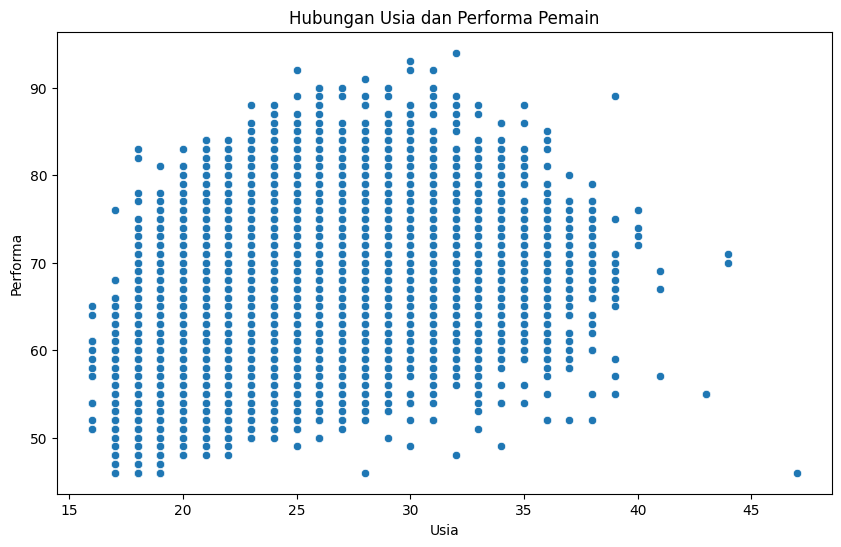

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='overall', data=df)
plt.title('Hubungan Usia dan Performa Pemain')
plt.xlabel('Usia')
plt.ylabel('Performa')
plt.show()

In [288]:
def prediksi_performa(model, data, nama_pemain, usia_baru):
    # Cari data pemain berdasarkan nama
    if 'name' in data.columns:
        pemain_data = data[data['name'] == nama_pemain]

        if not pemain_data.empty:
            # Ambil fitur yang diperlukan dari data pemain
            height_cm = pemain_data['height_cm'].values[0]
            weight_kg = pemain_data['weight_kg'].values[0]
            eur_value = pemain_data['eur_value'].values[0]
            overall = pemain_data['overall'].values[0]
            potential = pemain_data['potential'].values[0]
            pac = pemain_data['pac'].values[0]
            sho = pemain_data['sho'].values[0]
            pas = pemain_data['pas'].values[0]
            dri = pemain_data['dri'].values[0]
            phy = pemain_data['phy'].values[0]

            # Buat array fitur untuk pemain pada usia baru
            pemain_fitur_baru = np.array([[usia_baru, height_cm, weight_kg, eur_value, overall, potential, pac, sho, pas, dri, phy]])

            # Prediksi kinerja pemain menggunakan model
            pemain_prediksi_performa = model.predict(pemain_fitur_baru)

            # Kembalikan hasil prediksi
            return pemain_prediksi_performa[0]
        else:
            return f"Pemain dengan nama {nama_pemain} tidak ditemukan dalam dataset."
    else:
        return "Kolom 'name' tidak ditemukan dalam dataset."

# **Prediksi Peforma Pemain Berdasarkan Usia**

In [289]:
prediksi = prediksi_performa(model, data, 'Marcelo', 40)
print(f"Prediksi performa Marcelo pada usia 40 tahun: {prediksi}")

Prediksi performa Marcelo pada usia 40 tahun: 81.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
